Tải data

Repo card metadata block was not found. Setting CardData to empty.


Đang kiểm tra mẫu đầu tiên...
--- THÀNH CÔNG ---


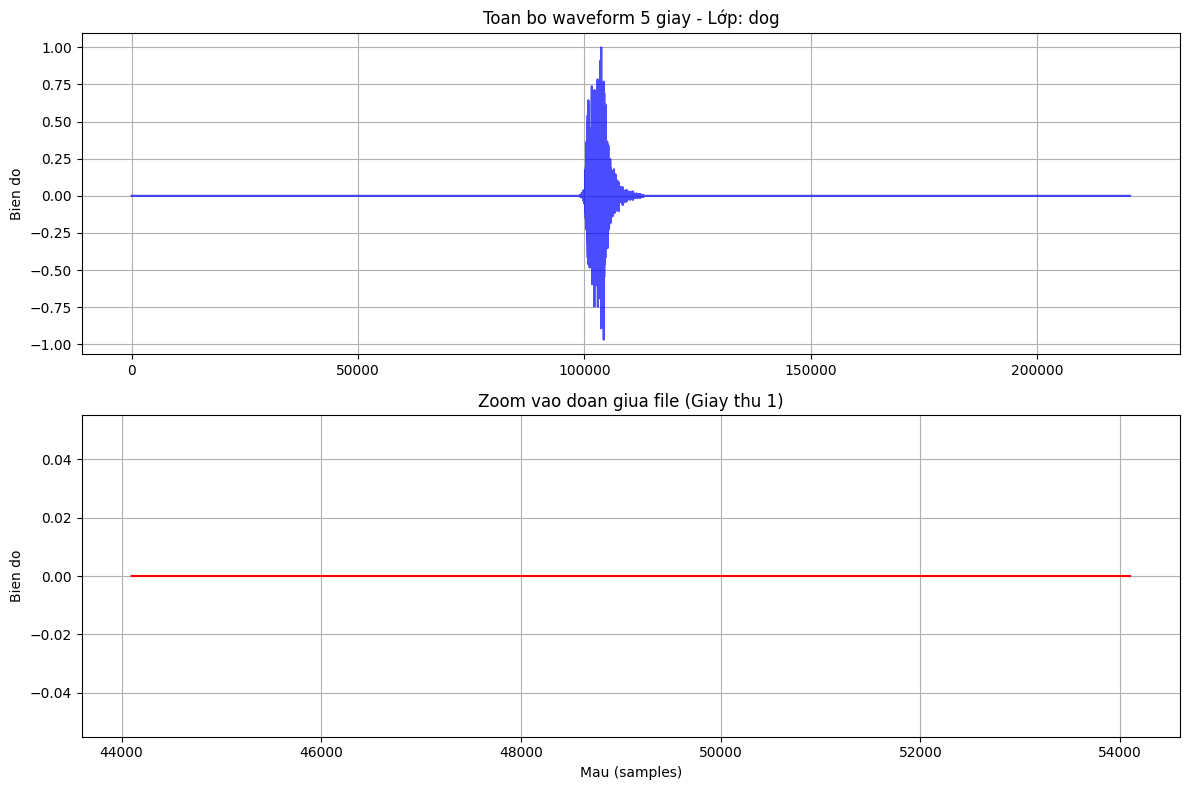

In [5]:
import sys
import os
import io

# 1. Khai báo thư viện ổ E
sys.path.append(r"E:\PythonPackages")
os.environ['HF_HOME'] = r"E:\PythonData\huggingface_cache"

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset, Audio

# 2. Tải dataset
dataset = load_dataset("ashraq/esc50", split="train")

# 3. Tắt tự động decode để tránh lỗi torchcodec
dataset = dataset.cast_column("audio", Audio(decode=False))

# 4. Hàm giải mã thủ công
def process_audio(sample):
    try:
        audio_dict = sample['audio']
        audio_bytes = audio_dict['bytes']
        audio_array, sr = sf.read(io.BytesIO(audio_bytes))
        return audio_array, sr
    except Exception as e:
        print(f"Lỗi khi xử lý: {e}")
        return None, None

# 5. Chạy thử nghiệm và vẽ biểu đồ
print("Đang kiểm tra mẫu đầu tiên...")
audio_array, sr = process_audio(dataset[0])

if audio_array is not None:
    print("--- THÀNH CÔNG ---")
    
    # Tạo khung hình với 2 biểu đồ
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Biểu đồ 1: Toàn bộ 5 giây (để thấy tổng quan các cụm sóng)
    ax1.plot(audio_array, color='blue', alpha=0.7)
    ax1.set_title(f"Toan bo waveform 5 giay - Lớp: {dataset[0]['category']}")
    ax1.set_ylabel("Bien do")
    ax1.grid(True)
    
    # Biểu đồ 2: Zoom vào đoạn có tiếng động (thường từ giây thứ 1)
    start_s = 44100   # Giây thứ 1
    end_s = 44100 + 10000 # Lấy thêm 10.000 mẫu
    ax2.plot(range(start_s, end_s), audio_array[start_s:end_s], color='red')
    ax2.set_title("Zoom vao doan giua file (Giay thu 1)")
    ax2.set_xlabel("Mau (samples)")
    ax2.set_ylabel("Bien do")
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

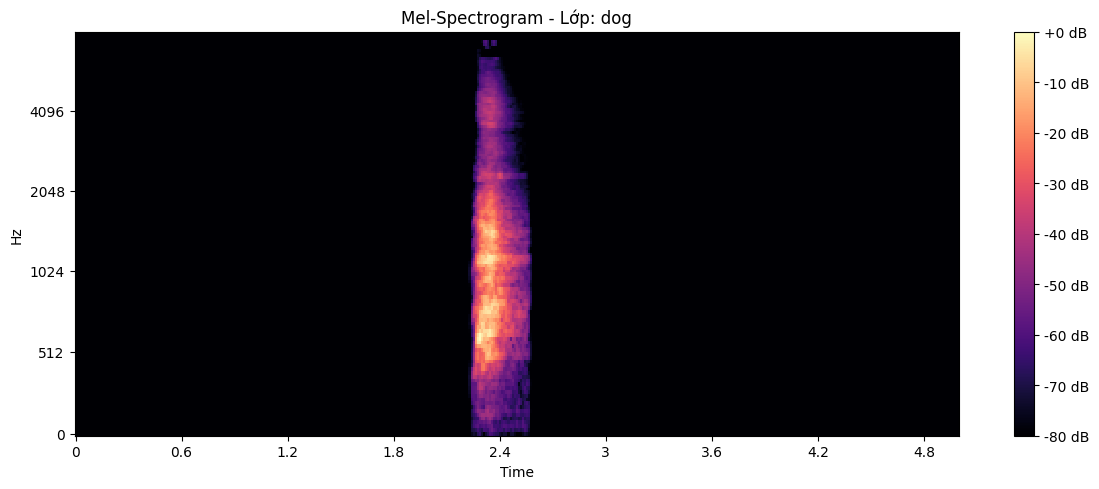

In [6]:
import librosa
import librosa.display

# 1. Chuyển đổi sang Mel-Spectrogram (sử dụng audio_array đã load)
# n_mels=128 là kích thước chuẩn cho các mô hình CNN âm thanh
S = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_mels=128)

# 2. Chuyển sang đơn vị decibel (dB) để hình ảnh rõ nét hơn
S_dB = librosa.power_to_db(S, ref=np.max)

# 3. Hiển thị hình ảnh tần số
plt.figure(figsize=(12, 5))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel-Spectrogram - Lớp: {dataset[0]['category']}")
plt.tight_layout()
plt.show()

In [1]:
import os
import shutil

# --- CẤU HÌNH ---
# Đường dẫn tới thư mục gốc chứa 2000 file của ESC-50
src_dir = r"C:\CODE\Python\DeepLearning\AudioDemo\uploads" 
# Thư mục đích để chứa 10 file demo
dest_dir = r"C:\CODE\demo_10_cases"

# Danh sách ID nhãn tương ứng với 10 case tiêu biểu (theo config.json của bạn)
# 18: dog, 37: rooster, 36: rain, 38: sea_waves, 17: crying_baby, 
# 41: sneezing, 6: chainsaw, 10: clock_alarm, 40: siren, 45: train
target_labels = {
    18: "dog",
    37: "rooster", 
    36: "rain",
    38: "sea_waves",
    17: "crying_baby",
    41: "sneezing",
    6: "chainsaw",
    10: "clock_alarm",
    40: "siren",
    45: "train"
}

os.makedirs(dest_dir, exist_ok=True)

print("--- Đang trích xuất 10 case demo ---")

found_count = 0
for label_id, label_name in target_labels.items():
    # File ESC-50 có định dạng: fold-id-take-label_id.wav (Ví dụ: 1-100032-A-0.wav)
    # Chúng ta tìm file có phần cuối là -label_id.wav
    suffix = f"-{label_id}.wav"
    
    success = False
    for filename in os.listdir(src_dir):
        if filename.endswith(suffix):
            src_path = os.path.join(src_dir, filename)
            # Đổi tên file khi copy để dễ nhận biết lúc demo
            new_name = f"{label_name}_{filename}" 
            dest_path = os.path.join(dest_dir, new_name)
            
            shutil.copy(src_path, dest_path)
            print(f"✅ Đã lấy: {new_name}")
            success = True
            found_count += 1
            break # Chỉ lấy 1 file mẫu cho mỗi lớp
            
    if not success:
        print(f"❌ Không tìm thấy file cho nhãn: {label_name} (ID: {label_id})")

print(f"\nHoàn tất! Đã lấy {found_count}/10 file vào thư mục: {dest_dir}")

--- Đang trích xuất 10 case demo ---
✅ Đã lấy: dog_1-20736-A-18.wav
✅ Đã lấy: rooster_1-13613-A-37.wav
✅ Đã lấy: rain_1-100210-A-36.wav
✅ Đã lấy: sea_waves_1-21934-A-38.wav
✅ Đã lấy: crying_baby_1-118559-A-17.wav
✅ Đã lấy: sneezing_1-116765-A-41.wav
✅ Đã lấy: chainsaw_1-18074-A-6.wav
✅ Đã lấy: clock_alarm_1-17367-A-10.wav
✅ Đã lấy: siren_1-172649-A-40.wav
✅ Đã lấy: train_1-119125-A-45.wav

Hoàn tất! Đã lấy 10/10 file vào thư mục: C:\CODE\demo_10_cases
